In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, average_precision_score, PrecisionRecallDisplay, recall_score, f1_score, precision_recall_curve, auc, classification_report, confusion_matrix, make_scorer, fbeta_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
import shap
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

In [65]:
df_test=pd.read_csv('../data/output/countinuous_dfs/testing_sample_cleaned_continuous_MB.csv') 

In [ ]:
df_test

In [7]:
df=pd.read_csv('../data/output/countinuous_dfs/development_sample_cleaned_continuous_MB.csv') 
df.head() 

,ID,customer_id,_r_,Var1,Var4,Var5,Var6,Var7,Var15,Var16,...,Var14_3,Var14_4,ii_ratio,chs,savings_assets,request_frequency_stability,experience_loan_purpose,income_employment_stability,idi_ratio,Inf_ii
0,11034977,32537148,0.267045,1,7800,99,1,108.73,0,0,...,0,0,0.019278,0,6768.42,1,186.0,5640,0.045922,0
1,11034978,32761663,0.533040,1,11100,78,1,195.99,4,4,...,0,1,0.065330,0,9808.26,0,160.0,3000,0.121533,0
2,11034979,32701063,0.861555,2,2400,15,1,248.34,0,0,...,0,0,0.023562,0,7110.85,8,1240.0,6240,0.042548,0
3,11034980,32386786,0.506451,3,11800,30,6,3538.68,0,0,...,0,0,0.501229,0,25158.68,0,530.0,4560,0.777510,0
4,11034982,32861919,0.003446,1,7200,36,1,267.19,1,1,...,0,0,0.067472,0,1828.62,0,416.0,0,0.138744,0


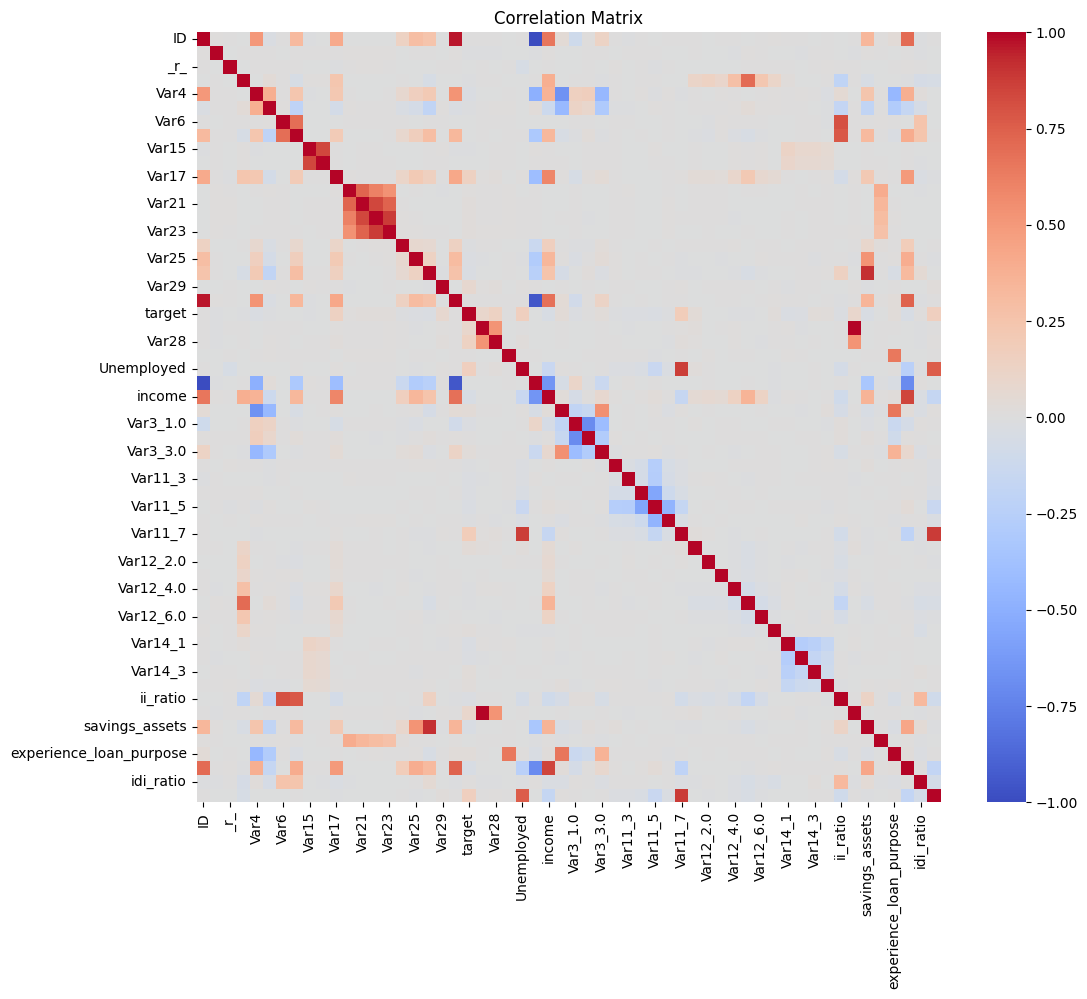

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Matrix')

# Show plot
plt.show()


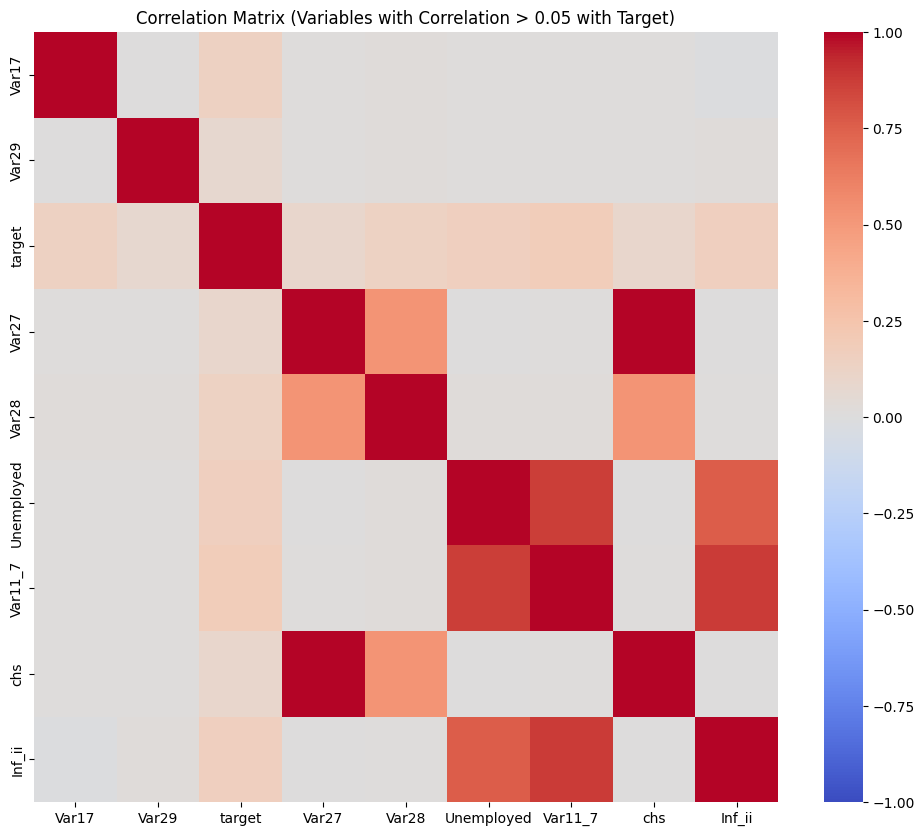

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Assuming 'target' is the target variable column name

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter the correlation matrix to include only values greater than 0.05 or less than -0.05 with the target variable
correlation_target = correlation_matrix['target']
correlation_filtered = correlation_target[(correlation_target > 0.05) | (correlation_target < -0.05)]

# Create a new correlation matrix with only the selected variables
correlation_selected = correlation_matrix.loc[correlation_filtered.index, correlation_filtered.index]

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(correlation_selected, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Matrix (Variables with Correlation > 0.05 with Target)')

# Show plot
plt.show()


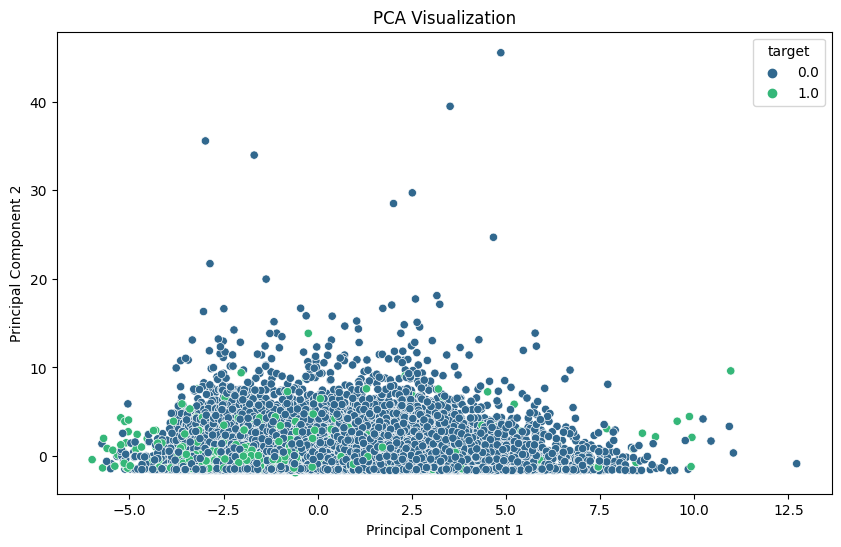

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']  # Assuming 'target' is your target column

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis', legend='full')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


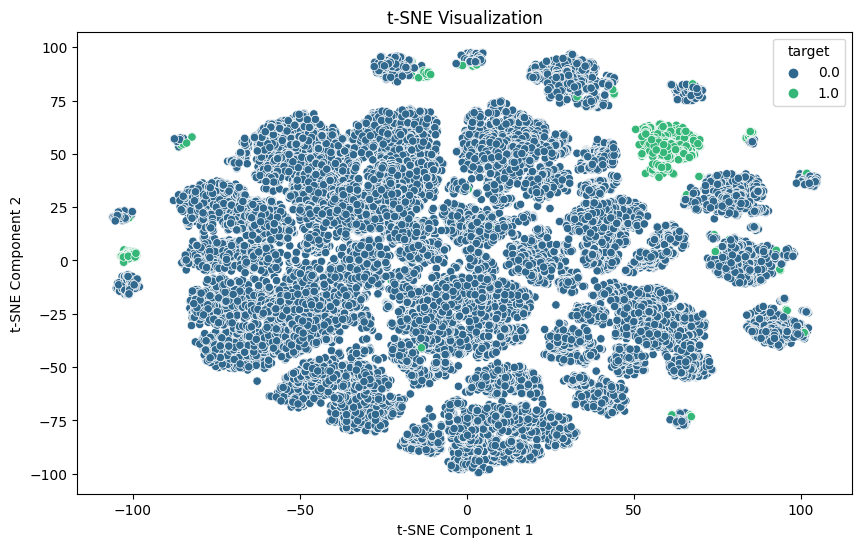

In [32]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# Create a DataFrame for visualization
df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['target'] = df['target']  # Assuming 'target' is your target column

# Plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='target', data=df_tsne, palette='viridis', legend='full')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


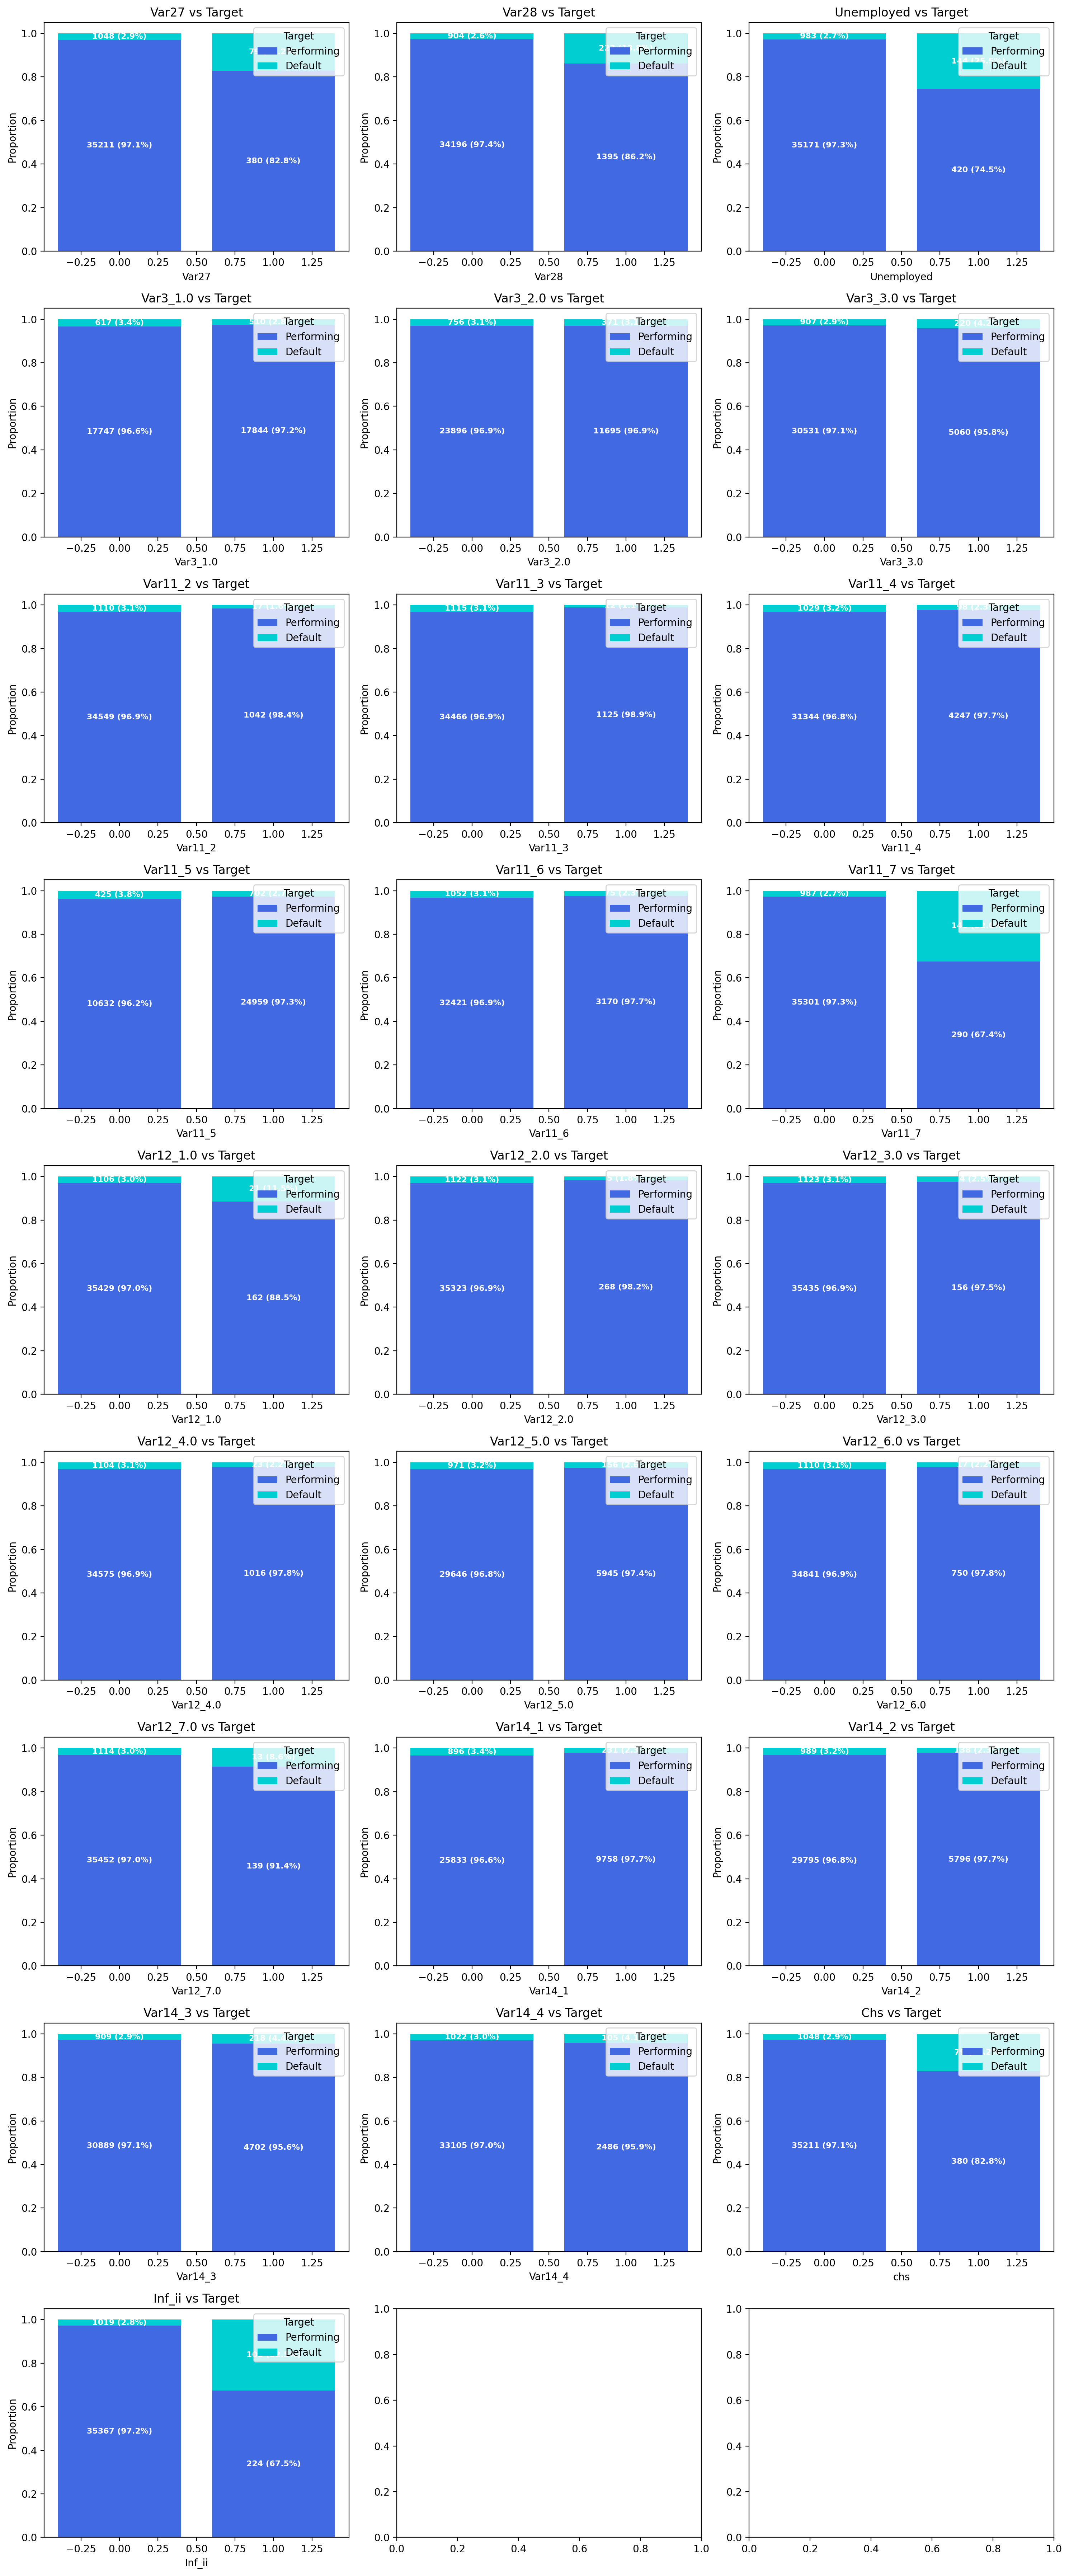

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming df is your DataFrame
# Assuming 'target' is your target variable

# Filter binary columns
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'target']

# Define colormap
cmap = ListedColormap(['royalblue', 'darkturquoise'])

# Define the number of rows and columns for subplots
num_rows = len(binary_columns) // 3 + (len(binary_columns) % 3 > 0)
num_cols = min(len(binary_columns), 3)

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows*4), dpi=200)

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through binary columns
for i, col in enumerate(binary_columns):
    # Create a cross tabulation showing the proportion of target values for each category of the binary feature
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    
    # Calculate the proportion of target values for each category
    cross_tab_prop = cross_tab.div(cross_tab.sum(1), axis=0)
    
    # Plot stacked bar chart with 'Target == 1' on top and 'Target == 0' on the bottom
    axs[i].bar(cross_tab_prop.index, cross_tab_prop[0], color='royalblue', label='Performing')
    axs[i].bar(cross_tab_prop.index, cross_tab_prop[1], bottom=cross_tab_prop[0], color='darkturquoise', label='Default')
    
    # Add labels and title
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Proportion')
    axs[i].set_title(f'{col.capitalize()} vs Target')
    
    # Add legend
    axs[i].legend(title='Target', loc='upper right', labels=['Performing', 'Default'])
    
    # Add annotations
    for idx, val in enumerate(cross_tab.index.values):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            axs[i].text(x=idx, y=y_location - proportion / 2, s=f'{count} ({proportion:.1%})', ha='center', va='center',
                        color='white', fontsize=8, fontweight='bold')
    
# Adjust layout
plt.tight_layout()
plt.show()


In [63]:
models = {
    'Random Forest': RandomForestClassifier(random_state=123),
    'XGBoost': XGBClassifier(random_state=123, n_jobs=-1, objective='binary:logistic'),
    'LightGBM': LGBMClassifier(random_state=123),
    'SVC': SVC(probability=True, random_state=123),
    #'CatBoost': CatBoostClassifier(random_state=123, verbose=0),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=123, max_iter = 1000)
}

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'learning_rate': [0.04, 0.05, 0.6],
    'n_estimators': [60,80,100],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_lgbm = {
    'learning_rate': [0.04, 0.05, 0.6],
    'n_estimators': [60,80, 100],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_svc = {
    'C': [0.9,1,1.1],
    'gamma': [0.1, 1, 'scale', 'auto']
}

#param_grid_catboost = {
#    'iterations': [60,80, 100],
#    'learning_rate': [0.005,0.01],
#    'depth': [4, 6, 8],
#    'l2_leaf_reg': [1, 3, 5],
#    'auto_class_weights': ['None', 'Balanced'],
#}

param_grid_knn = {
    'n_neighbors': [9,14,17,20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

param_grid_logreg = {
    'C': [ 0.09, 0.1, 1.1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [71]:
# Separate features and target variable for training data
X_train = df.drop('target', axis=1)
y_train = df['target']

# Separate features and target variable for testing data
X_test = df_test.drop('target', axis=1)
y_test = df_test['target']

In [72]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
rus = RandomUnderSampler(random_state=123)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


Training model: Random Forest

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.54      0.70      3526
         1.0       0.03      0.48      0.06       121

    accuracy                           0.54      3647
   macro avg       0.50      0.51      0.38      3647
weighted avg       0.94      0.54      0.68      3647


Training model: XGBoost

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.52      0.68      3526
         1.0       0.04      0.51      0.07       121

    accuracy                           0.52      3647
   macro avg       0.50      0.52      0.37      3647
weighted avg       0.94      0.52      0.66      3647


Training model: LightGBM

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.26      0.41      3526
         1.0       0.03      0.78      0.07       121

    accuracy                

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge



Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.84      3526
         1.0       0.05      0.39      0.08       121

    accuracy                           0.72      3647
   macro avg       0.51      0.56      0.46      3647
weighted avg       0.94      0.72      0.81      3647



The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


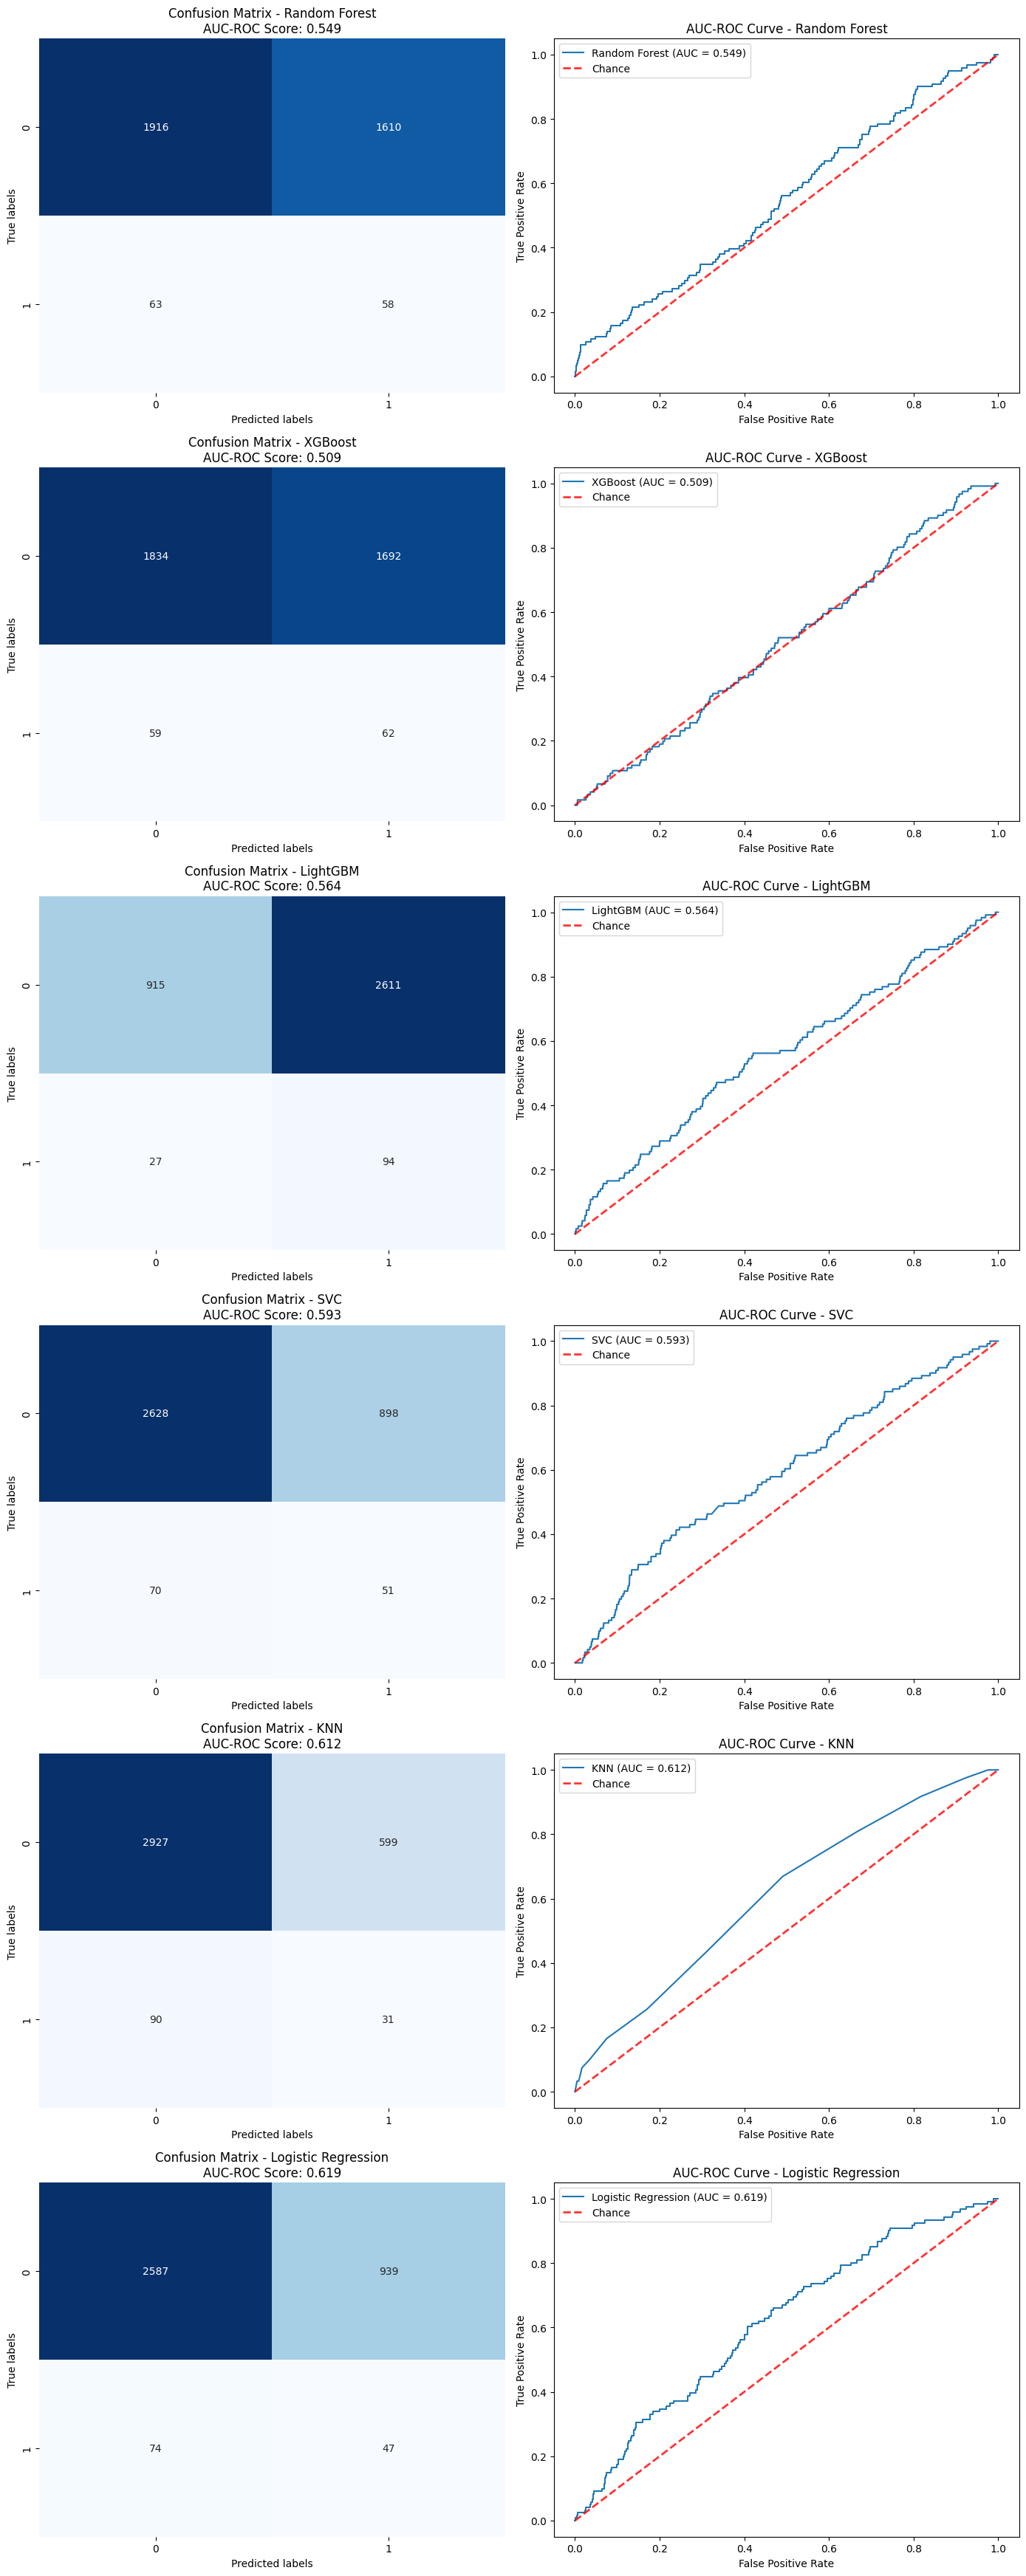


Results Table:


,Model_name,Parameters,CV_score,Test_score
0,Random Forest,"{'max_depth': 4, 'min_samples_split': 2, 'n_es...",0.270647,0.549437
1,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.242824,0.508652
2,LightGBM,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.247958,0.564405
3,SVC,"{'C': 0.9, 'gamma': 'scale'}",0.557490,0.593105
4,KNN,"{'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}",0.534342,0.611911
5,Logistic Regression,"{'C': 0.09, 'penalty': 'l1', 'solver': 'saga'}",0.572553,0.618742


In [73]:
from sklearn.model_selection import cross_val_score
from IPython.display import display
results = []
best_models = {} 

plt.figure(figsize=(14, 35))
for i, (name, model) in enumerate(models.items(), 1):
    print(f"\nTraining model: {name}")
    
    # Initialize GridSearchCV with the model and it's parameter grid
    if name == 'Random Forest':
        grid_search = GridSearchCV(model, param_grid_rf, cv=5, scoring='precision', n_jobs=-1, verbose=0)
    elif name == 'XGBoost':
        grid_search = GridSearchCV(model, param_grid_xgb, cv=5, scoring='precision', n_jobs=-1, verbose=0)
    elif name == 'LightGBM':
        grid_search = GridSearchCV(model, param_grid_lgbm, cv=5, scoring='precision', n_jobs=-1, verbose=0)
    elif name == 'SVC':
        grid_search = GridSearchCV(model, param_grid_svc, cv=5, scoring='precision', n_jobs=-1, verbose=0)
    #elif name == 'CatBoost':
    #    grid_search = GridSearchCV(model, param_grid_catboost, cv=5, scoring='precision', n_jobs=-1, verbose=0)
    elif name == 'KNN':
        grid_search = GridSearchCV(model, param_grid_knn, cv=5, scoring='precision', n_jobs=-1, verbose=0)
    elif name == 'Logistic Regression':
        grid_search = GridSearchCV(model, param_grid_logreg, cv=5, scoring='precision', n_jobs=-1, verbose=0)
    
    # Fitting Grid Search on the resampled data
    grid_search.fit(X_resampled, y_resampled)
    
    # Get the best parameters and the best model
    best_params = grid_search.best_params_
    best_model = model.set_params(**best_params)
    best_model.fit(X_resampled, y_resampled)
    best_models[name] = best_model

    # Calculate AUC-ROC
    y_prob = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_roc = roc_auc_score(y_test, y_prob)
    
    # Print classification report
    print("\nClassification Report:")
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    plt.subplot(6, 2, 2*i-1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}\nAUC-ROC Score: {auc_roc:.3f}')
    
    # Plot AUC-ROC Curve
    plt.subplot(6, 2, 2*i)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_roc:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'AUC-ROC Curve - {name}')
    plt.legend()

    # Calculate cross-validated score
    cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=3, scoring='roc_auc')
    cv_score_mean = cv_scores.mean()
    
    # Calculate final test score
    test_score = roc_auc_score(y_test, y_prob)
    
    results.append({
        'Model_name': name,
        'Parameters': str(best_params),
        'CV_score': cv_score_mean,
        'Test_score': test_score
    })

    

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
print("\nResults Table:")
display(results_df)




AttributeError: 'bool' object has no attribute 'all'

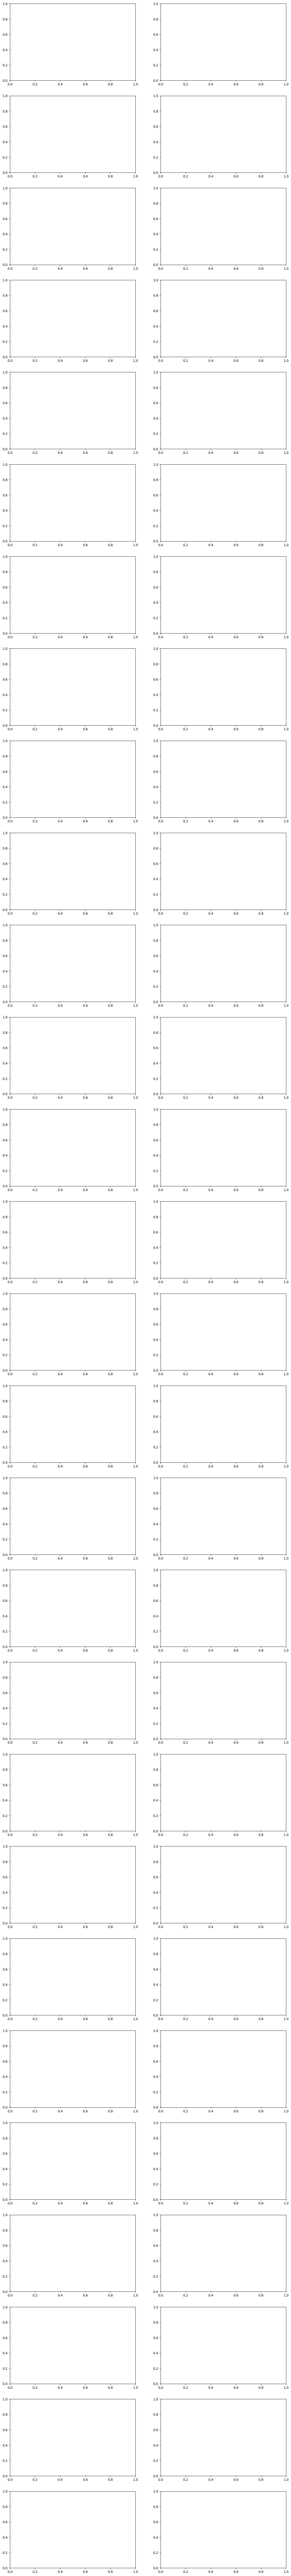

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Assuming 'target' is the target variable column name

# Create lists of binary and non-binary column names
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'target']
non_binary_columns = [col for col in df.columns if col not in binary_columns and col not in ['customer_id', 'ID', 'target']]

# Calculate the number of rows needed for subplots
nrows = len(binary_columns)

# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 5 * nrows))

# Iterate through binary columns for histograms
for i, col in enumerate(binary_columns):
    sns.histplot(df, x=col, hue='target', multiple='dodge', ax=axs[i, 0], kde=True)
    axs[i, 0].set_title(f'Histogram of {col} by Target')


# Remove empty plots if there are any
for i in range(nrows, len(axs.flat)):
    fig.delaxes(axs.flatten()[i])

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()



AttributeError: 'bool' object has no attribute 'all'

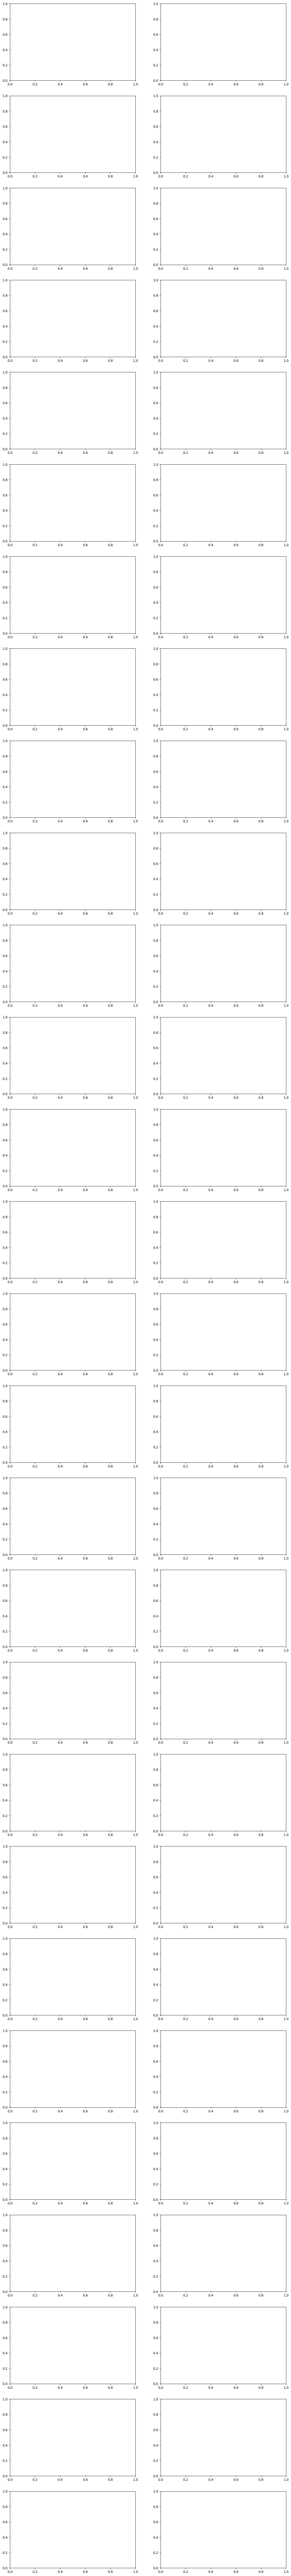

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Assuming 'target' is the target variable column name

# Create lists of binary and non-binary column names
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'target']
non_binary_columns = [col for col in df.columns if col not in binary_columns and col not in ['customer_id', 'ID', 'target']]

# Calculate the number of rows needed for subplots
nrows = len(non_binary_columns)
ncols = 2

# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 5 * nrows))

# Iterate through non-binary columns for boxplots
for i, col in enumerate(non_binary_columns):
    row = i // ncols  # Calculate the row index
    col = i % ncols   # Calculate the column index
    sns.boxplot(data=df, x='target', y=col, ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot of {col} by Target')

# Remove empty plots if there are any
for i in range(nrows * ncols, len(axs.flat)):
    fig.delaxes(axs.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
